#### **Prevelance of Childhood Obesity in English Local Authorities**

##### **Research Question**: How has CHOC in English LAs changed between 2008 and 2018, and to what extent can variations in cases be explained by funding choices? 

##### **1. Import packages and read in dataset**

In [1]:
import pandas as pd
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm

import numpy as np

import sklearn
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix

import matplotlib.pyplot as plt
import seaborn as sn

import scipy as sp
import scipy.stats as sps

In [2]:
pd.set_option('display.max_rows', 300) # specifies number of rows to show
pd.options.display.float_format = '{:40,.4f}'.format # specifies default number format to 4 decimal places
plt.style.use('ggplot') # specifies that graphs should use ggplot styling

In [3]:
child_obesity = pd.read_csv('coursework_1_data_2019.csv')
print(f"Data frame is {child_obesity.shape[0]:,} x {child_obesity.shape[1]}")

Data frame is 152 x 28


In [4]:
child_obesity.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 152 entries, 0 to 151
Data columns (total 28 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   local_authority_area  152 non-null    object
 1   2008_cases_total      152 non-null    int64 
 2   2013_cases_total      152 non-null    int64 
 3   2018_cases_total      152 non-null    int64 
 4   2008_pop_total        152 non-null    int64 
 5   2013_pop_total        152 non-null    int64 
 6   2018_pop_total        152 non-null    int64 
 7   2008_cases_male       152 non-null    int64 
 8   2013_cases_male       152 non-null    int64 
 9   2018_cases_male       152 non-null    int64 
 10  2008_pop_male         152 non-null    int64 
 11  2013_pop_male         152 non-null    int64 
 12  2018_pop_male         152 non-null    int64 
 13  2008_cases_female     152 non-null    int64 
 14  2013_cases_female     152 non-null    int64 
 15  2018_cases_female     152 non-null    in

##### **2. Adding in new columns for change in cases from 2008 - 2018 per 100,000 population**

In [5]:
#Creating a new variable for the proportion of cases against total population

#cases per 100,000 children
child_obesity['cases_prop'] = ((child_obesity['2018_cases_total'] / child_obesity['2018_pop_total'])*100000) - ((child_obesity['2008_cases_total'] / child_obesity['2008_pop_total'])*100000)

#subcategories of funding per 100,000 children
child_obesity['clean_air_prop'] =  (child_obesity['clean_air'] / child_obesity['2018_pop_total'])*100000 
child_obesity['clean_environ_prop'] = (child_obesity['clean_environ'] / child_obesity['2018_pop_total'])*100000 
child_obesity['health_train_prop'] = (child_obesity['health_training'] / child_obesity['2018_pop_total'])*100000 
child_obesity['school_aw_prop'] = (child_obesity['school_awareness'] / child_obesity['2018_pop_total'])*100000 
child_obesity['media_aw_prop'] = (child_obesity['media_awareness'] / child_obesity['2018_pop_total'])*100000 
child_obesity['sub_coun_prop'] = (child_obesity['sub_counselling'] / child_obesity['2018_pop_total'])*100000 

#total budget per 100,000 children
child_obesity['budget_prop'] = ((child_obesity['total_budget']) / (child_obesity['2018_pop_total']))*100000

##### **3. Checking for outliers - using z-scores**

#####          **3.1 Looking at outliers in terms of proportion of cases**

In [6]:
from scipy import stats

z = np.abs(stats.zscore(child_obesity.cases_prop))
print(z)

[1.64811338e+00 9.51168936e-01 4.23942978e-01 1.16732529e+00
 6.47317055e-01 9.35988072e-01 5.57450063e-01 1.96851302e+00
 9.75983345e-01 6.11251581e-01 1.26779446e+00 7.83324013e-01
 4.09403702e-01 4.75225068e-01 1.33746098e+00 1.35782056e-01
 1.81687655e+00 2.68373858e-01 2.43978470e-01 1.57790814e-01
 1.36880142e+00 2.79928947e-01 4.37483725e-01 5.82269737e-01
 8.54363536e-01 1.09697398e+00 1.60848894e-01 3.10045429e-01
 1.35155834e+00 4.27695543e-01 1.03244612e+00 6.91540500e-02
 6.85850063e-01 7.25399670e-01 1.15447898e-01 2.74395500e-01
 7.81610565e-01 2.20741582e-01 1.60165532e+00 5.22086766e-01
 4.89958268e-01 1.27678734e+00 9.13371813e-01 1.35216532e+00
 3.66110550e-01 1.03937891e+00 2.64794033e+00 4.47349918e-01
 1.57033093e-01 8.10649427e-01 1.23394784e+00 1.53439734e+00
 3.97003264e-01 4.09786135e-01 6.27682604e-01 8.90973383e-01
 4.21981932e-01 4.83161050e-01 4.74729087e-01 3.91355952e+00
 1.42753330e+00 1.85974505e+00 8.93911036e-01 1.45233332e-01
 1.67567562e+00 4.350328

In [7]:
threshold = 3
print(np.where(z > 3))

(array([59]),)


In [8]:
child_obesity.iloc[59]

local_authority_area                            Isles of Scilly
2008_cases_total                                              5
2013_cases_total                                              1
2018_cases_total                                              4
2008_pop_total                                             2200
2013_pop_total                                             2385
2018_pop_total                                             2440
2008_cases_male                                               2
2013_cases_male                                               0
2018_cases_male                                               1
2008_pop_male                                              1085
2013_pop_male                                              1305
2018_pop_male                                              1426
2008_cases_female                                             3
2013_cases_female                                             1
2018_cases_female                       

##### **3.2 Looking at outliers in terms of budget proportion**

In [9]:
z = np.abs(stats.zscore(child_obesity.budget_prop))
print(z)

[4.55491769e-02 3.72669961e-01 3.67357935e-01 1.45633500e-01
 5.00918675e-02 5.41274280e-02 4.50973610e-02 3.24023049e-01
 2.54578946e-01 1.79467871e-01 2.27525031e-01 4.56849484e-02
 2.09287032e-01 6.10032124e-02 2.11826690e-01 8.95244009e-02
 1.69362022e-01 3.24069358e-01 1.31370270e-01 2.07194868e-01
 9.43743639e-02 1.59636085e-01 3.65947070e-01 7.26571644e-02
 1.71572899e-02 1.20095172e+01 2.19546989e-01 7.96441183e-02
 3.81796520e-01 3.47108304e-01 1.75796566e-01 1.38138272e-01
 2.15250595e-01 2.56958263e-01 3.81593352e-01 3.82527263e-01
 4.34720598e-03 1.17622026e-01 6.67281775e-02 1.49259915e-01
 9.47746001e-02 9.89650226e-02 2.02793872e-01 4.02778849e-01
 2.43426213e-01 2.82991114e-01 1.08887336e-01 1.01177194e-01
 8.90566904e-02 3.77051494e-02 3.27796490e-02 4.68672869e-02
 3.13597730e-01 5.55758099e-02 4.48596499e-01 6.23127489e-02
 1.59812401e-01 9.58354598e-03 1.81685022e-01 7.71856477e-02
 7.39255965e-02 1.61696124e-01 1.43611006e-01 1.01295149e-01
 1.32267170e-01 9.971569

In [10]:
threshold = 3
print(np.where(z > 3))

(array([25]),)


In [11]:
child_obesity.iloc[25]

local_authority_area                             City of London
2008_cases_total                                             16
2013_cases_total                                             14
2018_cases_total                                             12
2008_pop_total                                            11378
2013_pop_total                                             9838
2018_pop_total                                             8107
2008_cases_male                                               5
2013_cases_male                                               3
2018_cases_male                                               3
2008_pop_male                                              5653
2013_pop_male                                              4728
2018_pop_male                                              4396
2008_cases_female                                            11
2013_cases_female                                            11
2018_cases_female                       

In [12]:
z[25]

12.00951720652219

##### **3.3. Choosing to only remove City of London**

In [13]:
child_obesity.loc[child_obesity['local_authority_area'] == 'City of London']

,local_authority_area,2008_cases_total,2013_cases_total,2018_cases_total,2008_pop_total,2013_pop_total,2018_pop_total,2008_cases_male,2013_cases_male,2018_cases_male,...,region,local_authority_type,cases_prop,clean_air_prop,clean_environ_prop,health_train_prop,school_aw_prop,media_aw_prop,sub_coun_prop,budget_prop
25,City of London,16,14,12,11378,9838,8107,5,3,3,...,London,other_london,7.3980,"148,020.2294","111,015.1721","74,010.1147","246,700.3824","24,670.0382","12,335.0191","616,750.9560"


In [14]:
child_obesity.drop([25], inplace=True)

In [15]:
print(f"Data frame is {child_obesity.shape[0]:,} x {child_obesity.shape[1]}")

Data frame is 151 x 36


##### **4. Set the local authority area as the index**

In [16]:
child_obesity.set_index('local_authority_area', inplace=True)

In [17]:
child_obesity.head()

,2008_cases_total,2013_cases_total,2018_cases_total,2008_pop_total,2013_pop_total,2018_pop_total,2008_cases_male,2013_cases_male,2018_cases_male,2008_pop_male,...,region,local_authority_type,cases_prop,clean_air_prop,clean_environ_prop,health_train_prop,school_aw_prop,media_aw_prop,sub_coun_prop,budget_prop
local_authority_area,,,,,,,,,,,,,,,,,,,,,
Barking and Dagenham,593,619,763,172684,179030,181779,187,190,230,83890,...,London,london_borough,76.3386,"11,552.4896","12,102.6081","9,902.1339","22,554.8606","9,902.1339","10,452.2525","76,466.4785"
Barnet,539,594,773,340435,344062,355955,212,204,292,169060,...,London,london_borough,58.8354,"14,046.7194","4,775.8846","6,461.4909","20,789.1447","8,428.0316","7,304.2941","61,805.5653"
Barnsley,360,451,527,226755,244010,257883,148,186,212,110384,...,Yorkshire and the Humber,metropolitan_borough,45.5946,"15,898.6827","17,449.7737","1,938.8637","10,082.0915","11,245.4097","5,428.8185","62,043.6399"
Bath and North East Somerset,456,421,494,178625,172975,189334,157,129,156,87026,...,South West,unitary_authority,5.6312,"17,429.5161","22,183.0205","10,035.1759","26,408.3577","5,281.6715","3,697.1701","85,034.9118"
Bedford,311,327,367,158185,164807,170463,138,145,156,75929,...,East of England,unitary_authority,18.6907,"21,705.5901","30,505.1536","9,972.8387","4,693.1006","1,759.9127","7,626.2884","76,262.8840"


In [18]:
# also dropping Columns not interested in
child_obesity = child_obesity.drop(['region', 'local_authority_type'], axis=1)

##### **5. Encoding of categorical variables**

In [19]:
child_obesity_numeric = pd.get_dummies(child_obesity)

In [20]:
# check out the new dataFrame
child_obesity_numeric.info()

<class 'pandas.core.frame.DataFrame'>
Index: 151 entries, Barking and Dagenham to York
Data columns (total 33 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   2008_cases_total    151 non-null    int64  
 1   2013_cases_total    151 non-null    int64  
 2   2018_cases_total    151 non-null    int64  
 3   2008_pop_total      151 non-null    int64  
 4   2013_pop_total      151 non-null    int64  
 5   2018_pop_total      151 non-null    int64  
 6   2008_cases_male     151 non-null    int64  
 7   2013_cases_male     151 non-null    int64  
 8   2018_cases_male     151 non-null    int64  
 9   2008_pop_male       151 non-null    int64  
 10  2013_pop_male       151 non-null    int64  
 11  2018_pop_male       151 non-null    int64  
 12  2008_cases_female   151 non-null    int64  
 13  2013_cases_female   151 non-null    int64  
 14  2018_cases_female   151 non-null    int64  
 15  2008_pop_female     151 non-null    int64 

In [21]:
child_obesity_numeric.columns.values

array(['2008_cases_total', '2013_cases_total', '2018_cases_total',
       '2008_pop_total', '2013_pop_total', '2018_pop_total',
       '2008_cases_male', '2013_cases_male', '2018_cases_male',
       '2008_pop_male', '2013_pop_male', '2018_pop_male',
       '2008_cases_female', '2013_cases_female', '2018_cases_female',
       '2008_pop_female', '2013_pop_female', '2018_pop_female',
       'total_budget', 'clean_air', 'clean_environ', 'health_training',
       'school_awareness', 'media_awareness', 'sub_counselling',
       'cases_prop', 'clean_air_prop', 'clean_environ_prop',
       'health_train_prop', 'school_aw_prop', 'media_aw_prop',
       'sub_coun_prop', 'budget_prop'], dtype=object)

##### 6. **KEY DESCRIPTIVE STATISTICS**

##### 6.1 **Cases distribution**

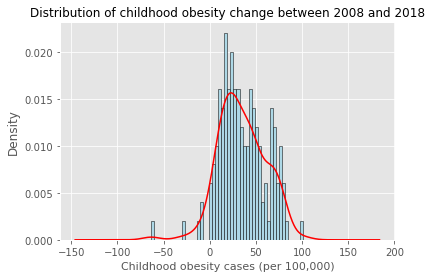

In [22]:
#Distribution of cases changes between 2008-2018

child_obesity_numeric['cases_prop'].plot(kind = 'hist', bins = 50, color = 'lightblue', edgecolor = 'black', density = True, alpha=1)
child_obesity_numeric['cases_prop'].plot(kind = 'kde', color = 'red')
plt.title('Distribution of childhood obesity change between 2008 and 2018',fontsize=12)
plt.xlabel("Childhood obesity cases (per 100,000)",fontsize=11)
plt.savefig('childhood obesity change 2008-2018 distribution')

##### 6.2 **Measures of Central Tendancy**

In [23]:
child_obesity_numeric.describe()

,2008_cases_total,2013_cases_total,2018_cases_total,2008_pop_total,2013_pop_total,2018_pop_total,2008_cases_male,2013_cases_male,2018_cases_male,2008_pop_male,...,media_awareness,sub_counselling,cases_prop,clean_air_prop,clean_environ_prop,health_train_prop,school_aw_prop,media_aw_prop,sub_coun_prop,budget_prop
count,151.0000,151.0000,151.0000,151.0000,151.0000,151.0000,151.0000,151.0000,151.0000,151.0000,...,151.0000,151.0000,151.0000,151.0000,151.0000,151.0000,151.0000,151.0000,151.0000,151.0000
mean,"1,082.3113","1,167.0993","1,286.9934","343,104.7285","356,563.1788","370,674.7947",378.2517,404.1656,441.1589,"167,982.7086",...,"33,172.1854","21,940.3974",35.1300,"16,209.2590","18,696.6198","7,092.4450","17,984.0053","9,090.7669","5,870.2839","74,943.3799"
std,921.3708,996.1394,"1,068.2243","261,618.5574","278,376.1109","294,100.8150",323.2133,353.4291,376.0441,"128,385.4728",...,"29,922.5136","19,825.3144",25.1801,"6,831.5516","7,629.9651","3,279.7504","8,310.9342","4,098.4322","2,579.0488","9,553.9487"
min,5.0000,1.0000,4.0000,"2,200.0000","2,385.0000","2,440.0000",2.0000,0.0000,1.0000,"1,085.0000",...,0.0000,0.0000,-63.3383,0.0000,0.0000,0.0000,430.8413,0.0000,0.0000,"58,402.6865"
25%,496.5000,532.5000,600.5000,"190,305.5000","190,900.0000","194,767.0000",177.5000,185.5000,199.0000,"93,350.5000",...,"14,000.0000","9,000.0000",17.9421,"12,037.4362","13,016.5757","4,671.9695","13,033.0943","5,938.7177","3,868.5208","68,266.4041"
50%,735.0000,807.0000,880.0000,"254,646.0000","258,299.0000","264,370.0000",267.0000,272.0000,295.0000,"122,765.0000",...,"25,000.0000","16,000.0000",31.4471,"16,272.4937","19,350.4125","7,358.4767","17,053.7876","9,260.5894","5,739.6672","74,260.2914"
75%,"1,400.0000","1,471.5000","1,661.0000","385,544.0000","412,631.0000","421,523.0000",475.5000,519.5000,555.5000,"189,027.0000",...,"40,500.0000","27,500.0000",50.8471,"20,081.1171","23,720.9567","8,932.0082","21,626.7802","11,791.5006","7,293.1579","80,771.0962"
max,"5,065.0000","5,582.0000","5,745.0000","1,411,380.0000","1,528,154.0000","1,623,387.0000","1,762.0000","2,065.0000","2,000.0000","694,681.0000",...,"203,000.0000","99,000.0000",101.4485,"39,579.0650","41,915.8963","19,176.4044","81,967.2131","22,976.8243","18,456.2210","118,737.1950"


In [24]:
child_obesity_numeric[['budget_prop']].describe()

,budget_prop
count,151.0000
mean,"74,943.3799"
std,"9,553.9487"
min,"58,402.6865"
25%,"68,266.4041"
50%,"74,260.2914"
75%,"80,771.0962"
max,"118,737.1950"


##### 6.3 **Boxplots**

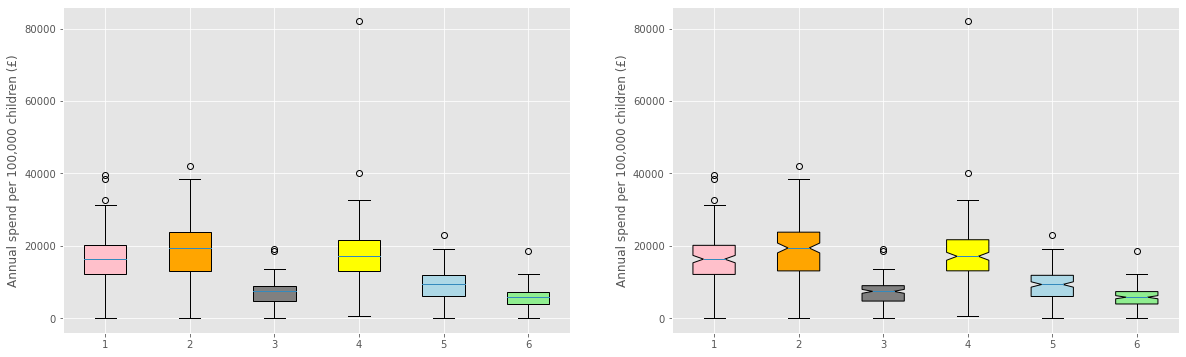

In [25]:
df=child_obesity_numeric['clean_air_prop'] , child_obesity_numeric['clean_environ_prop'],child_obesity_numeric['health_train_prop'], child_obesity_numeric['school_aw_prop'], child_obesity_numeric['media_aw_prop'], child_obesity_numeric['sub_coun_prop']
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(20, 6))

# rectangular box plot
bplot1 = axes[0].boxplot(df,
                         vert=True,   # vertical box aligmnent
                         patch_artist=True)   # fill with color

# notch shape box plot
bplot2 = axes[1].boxplot(df,
                         notch=True,  # notch shape
                         vert=True,   # vertical box aligmnent
                         patch_artist=True)   # fill with color

# fill with colors
colors = ['pink', 'orange', 'grey', 'yellow', 'lightblue', 'lightgreen']
for bplot in (bplot1, bplot2):
    for patch, color in zip(bplot['boxes'], colors):
        patch.set_facecolor(color)
        
for ax in axes:
    ax.yaxis.grid(True)
    ax.set_xticks([y+1 for y in range(len(df))], )
    ax.set_ylabel("Annual spend per 100,000 children (£)",fontsize=12)

#plt.title=("Local Authorities' annual spending on six environmental areas to tackle childhood obesity",fontsize=11)

plt.savefig('spending_boxplot')

##### 6.4 **Correlations**

In [26]:
# Calculate Pearson Correlation Coefficient
r_clean_air = np.corrcoef(child_obesity_numeric['cases_prop'], child_obesity_numeric['clean_air_prop'])
r_clean_environ = np.corrcoef(child_obesity_numeric['cases_prop'], child_obesity_numeric['clean_environ_prop'])
r_health_train = np.corrcoef(child_obesity_numeric['cases_prop'], child_obesity_numeric['health_train_prop'])
r_school_aw = np.corrcoef(child_obesity_numeric['cases_prop'], child_obesity_numeric['school_aw_prop'])
r_media_aw = np.corrcoef(child_obesity_numeric['cases_prop'], child_obesity_numeric['media_aw_prop'])
r_sub_coun = np.corrcoef(child_obesity_numeric['cases_prop'], child_obesity_numeric['sub_coun_prop'])

print('Pearson Correlation Coefficient for clean air is:',round(r_clean_air[0][1],4))
print('Pearson Correlation Coefficient for clean environment is:',round(r_clean_environ[0][1],4))
print('Pearson Correlation Coefficient for health training is:',round(r_health_train[0][1],4))
print('Pearson Correlation Coefficient for school awareness is:',round(r_school_aw[0][1],4))
print('Pearson Correlation Coefficient for media awareness is:',round(r_media_aw[0][1],4))
print('Pearson Correlation Coefficient for subsidising counselling is:',round(r_sub_coun[0][1],4))

Pearson Correlation Coefficient for clean air is: -0.0475
Pearson Correlation Coefficient for clean environment is: 0.1653
Pearson Correlation Coefficient for health training is: 0.0259
Pearson Correlation Coefficient for school awareness is: -0.2697
Pearson Correlation Coefficient for media awareness is: 0.3091
Pearson Correlation Coefficient for subsidising counselling is: 0.1705


##### 6.5 **Scatterplots**

In [27]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd
import statsmodels.api as sm
from statsmodels.iolib.summary2 import summary_col
#from linearmodels.iv import IV2SLS

plt.style.use('seaborn')

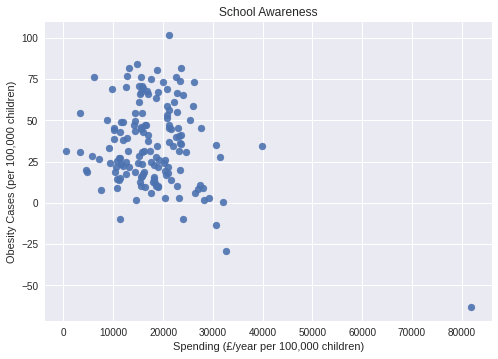

<Figure size 576x396 with 0 Axes>

In [28]:
fix, ax = plt.subplots()
ax.scatter(child_obesity_numeric[['school_aw_prop']], child_obesity_numeric[['cases_prop']], alpha=0.9,)

ax.set_title('School Awareness')
ax.set_xlabel('Spending (£/year per 100,000 children)')
ax.set_ylabel('Obesity Cases (per 100,000 children)')
plt.show()

plt.savefig('school awareness scatterplot')

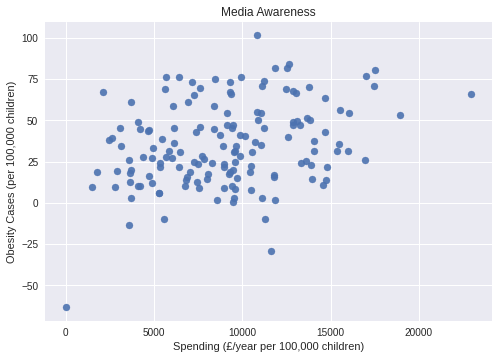

<Figure size 576x396 with 0 Axes>

In [29]:
fix, ax = plt.subplots()
ax.scatter(child_obesity_numeric[['media_aw_prop']], child_obesity_numeric[['cases_prop']], alpha=0.9,)

ax.set_title('Media Awareness')
ax.set_xlabel('Spending (£/year per 100,000 children)')
ax.set_ylabel('Obesity Cases (per 100,000 children)')
plt.show()

plt.savefig('media awareness scatterplot')

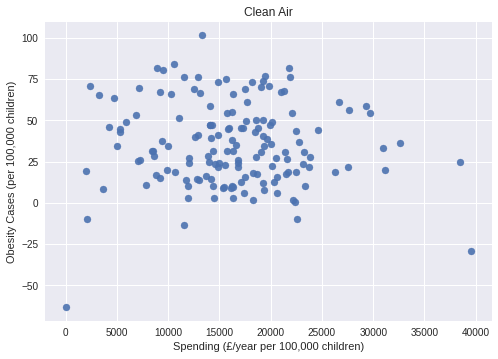

<Figure size 576x396 with 0 Axes>

In [30]:
fix, ax = plt.subplots()
ax.scatter(child_obesity_numeric[['clean_air_prop']], child_obesity_numeric[['cases_prop']], alpha=0.9,)

ax.set_title('Clean Air')
ax.set_xlabel('Spending (£/year per 100,000 children)')
ax.set_ylabel('Obesity Cases (per 100,000 children)')
plt.show()

plt.savefig('clean air scatterplot')

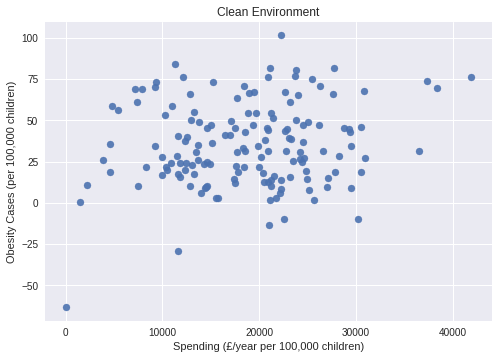

In [31]:
fix, ax = plt.subplots()
ax.scatter(child_obesity_numeric[['clean_environ_prop']], child_obesity_numeric[['cases_prop']], alpha=0.9,)
        
ax.set_title('Clean Environment')
ax.set_xlabel('Spending (£/year per 100,000 children)')
ax.set_ylabel('Obesity Cases (per 100,000 children)')
plt.show()

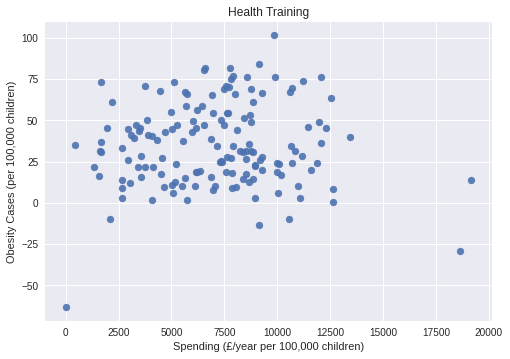

<Figure size 576x396 with 0 Axes>

In [32]:
fix, ax = plt.subplots()
ax.scatter(child_obesity_numeric[['health_train_prop']], child_obesity_numeric[['cases_prop']], alpha=0.9,)
    
ax.set_title('Health Training')
ax.set_xlabel('Spending (£/year per 100,000 children)')
ax.set_ylabel('Obesity Cases (per 100,000 children)')
plt.show()

plt.savefig('health training scatterplot')

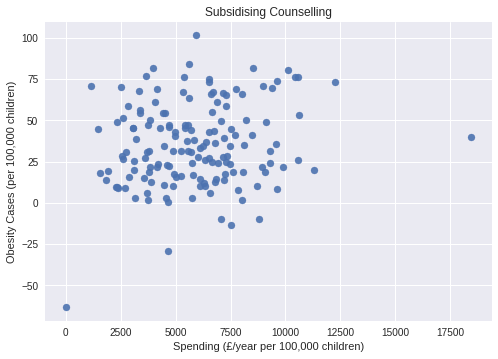

<Figure size 576x396 with 0 Axes>

In [33]:
fix, ax = plt.subplots()
ax.scatter(child_obesity_numeric[['sub_coun_prop']], child_obesity_numeric[['cases_prop']], alpha=0.9)

ax.set_title('Subsidising Counselling')
ax.set_xlabel('Spending (£/year per 100,000 children)')
ax.set_ylabel('Obesity Cases (per 100,000 children)')
plt.show()

plt.savefig('subsidising counselling scatterplot')

#### 7. **REGRESSION PREPARATION** 

##### 7.1 **Reference Variables and collinearity**

In [34]:
child_obesity_inc_references = child_obesity_numeric.drop(['total_budget', 'clean_air', 'clean_environ', 'health_training',
       'school_awareness', 'media_awareness', 'sub_counselling','2008_cases_total', '2018_cases_total', 'budget_prop', '2018_pop_total', '2013_cases_total', '2008_pop_total', '2013_pop_total', '2008_cases_male', '2013_cases_male', '2018_cases_male', '2018_cases_female', '2008_pop_male', '2013_pop_male', '2018_pop_male', '2008_cases_female', '2013_cases_female', '2008_pop_female', '2013_pop_female', '2018_pop_female'], axis=1)
child_obesity_inc_references.info()

<class 'pandas.core.frame.DataFrame'>
Index: 151 entries, Barking and Dagenham to York
Data columns (total 7 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   cases_prop          151 non-null    float64
 1   clean_air_prop      151 non-null    float64
 2   clean_environ_prop  151 non-null    float64
 3   health_train_prop   151 non-null    float64
 4   school_aw_prop      151 non-null    float64
 5   media_aw_prop       151 non-null    float64
 6   sub_coun_prop       151 non-null    float64
dtypes: float64(7)
memory usage: 9.4+ KB


In [35]:
child_obesity_final = child_obesity_inc_references.drop(['clean_air_prop'], axis=1)
child_obesity_final.info()

<class 'pandas.core.frame.DataFrame'>
Index: 151 entries, Barking and Dagenham to York
Data columns (total 6 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   cases_prop          151 non-null    float64
 1   clean_environ_prop  151 non-null    float64
 2   health_train_prop   151 non-null    float64
 3   school_aw_prop      151 non-null    float64
 4   media_aw_prop       151 non-null    float64
 5   sub_coun_prop       151 non-null    float64
dtypes: float64(6)
memory usage: 8.3+ KB


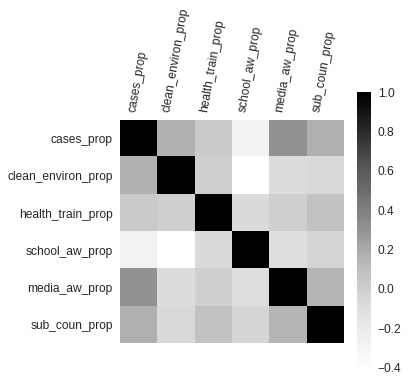

In [36]:
#CORRELATION MATRIX

df = child_obesity_final
plt.rcParams["axes.grid"] = False
f = plt.figure(figsize=(5, 5))
plt.matshow(df.corr(), fignum=f.number)
plt.xticks(range(df.shape[1]), df.columns, fontsize=12, rotation=80)
plt.yticks(range(df.shape[1]), df.columns, fontsize=12)
cb = plt.colorbar()
cb.ax.tick_params(labelsize=12)
#plt.title('Correlation Matrix', fontsize=14)

plt.savefig('correlation matrix')

##### 7.2 **Checking for multi-collinearity with VIF**

In [37]:
# calculating VIF
# This function is partially from: https://stackoverflow.com/a/51329496/4667568
from statsmodels.stats.outliers_influence import variance_inflation_factor 
from statsmodels.tools.tools import add_constant

def drop_column_using_vif_(df, thresh=5):
    '''
    Calculates VIF each feature in a pandas dataframe, and repeatedly drop the columns with the highest VIF
    A constant must be added to variance_inflation_factor or the results will be incorrect

    :param df: the pandas dataframe containing only the predictor features, not the response variable
    :param thresh: the max VIF value before the feature is removed from the dataframe
    :return: dataframe with multicollinear features removed
    '''
    while True:
        # adding a constatnt item to the data
        df_with_const = add_constant(df)

        vif_df = pd.Series([variance_inflation_factor(df_with_const.values, i) 
               for i in range(df_with_const.shape[1])], name= "VIF",
              index=df_with_const.columns).to_frame()

        # drop the const
        vif_df = vif_df.drop('const')
        
        # if the largest VIF is above the thresh, remove a variable with the largest VIF
        if vif_df.VIF.max() > thresh:
            # If there are multiple variables with the maximum VIF, choose the first one
            index_to_drop = vif_df.index[vif_df.VIF == vif_df.VIF.max()].tolist()[0]
            print('Dropping: {}'.format(index_to_drop))
            df = df.drop(columns = index_to_drop)
        else:
            # No VIF is above threshold. Exit the loop
            break

    return df

In [38]:
child_obesity_new = drop_column_using_vif_(child_obesity_inc_references.drop('cases_prop', axis=1))

In [39]:
child_obesity_final.columns

# using VIF on the child_obesity dataset

df_predictors_selected_VIF = drop_column_using_vif_(child_obesity_inc_references.drop('cases_prop', axis=1))
print("The columns remaining after VIF selection are:")
print(df_predictors_selected_VIF.columns)

The columns remaining after VIF selection are:
Index(['clean_air_prop', 'clean_environ_prop', 'health_train_prop',
       'school_aw_prop', 'media_aw_prop', 'sub_coun_prop'],
      dtype='object')


##### 8. **MULTIPLE LINEAR REGRESSION**

##### 8.1 **Model Results**

In [40]:
model_child_obesity = sm.OLS(endog=child_obesity_final[['cases_prop']], exog=sm.add_constant(df_predictors_selected_VIF[['clean_environ_prop', 'health_train_prop', 'school_aw_prop','media_aw_prop', 'sub_coun_prop']])).fit()
model_child_obesity.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             cases_prop   R-squared:                       0.179
Model:                            OLS   Adj. R-squared:                  0.151
Method:                 Least Squares   F-statistic:                     6.336
Date:                Mon, 16 Nov 2020   Prob (F-statistic):           2.38e-05
Time:                        15:34:26   Log-Likelihood:                -685.97
No. Observations:                 151   AIC:                             1384.
Df Residuals:                     145   BIC:                             1402.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                 13.9926     11.931      1.173      0.243      -9.588      37.573
clean_environ_prop     0.0004      0.000      1.471      0.143      -0.000       0.001
health_train_prop   3.426e-05      0.001      0.059      0.953      -0.001       0.001
school_aw_prop        -0.0006      0.000     -2.167      0.032      -0.001   -4.88e-05
media_aw_prop          0.0017      0.000      3.653      0.000       0.001       0.003
sub_coun_prop          0.0013      0.001      1.701      0.091      -0.000       0.003
==============================================================================
Omnibus:                        1.903   Durbin-Watson:                   2.107
Prob(Omnibus):                  0.386   Jarque-Bera (JB):                1.883
Skew:                           0.205   Prob(JB):                        0.390
Kurtosis:                       2.637   Cond. No.                     1.86e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.86e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [41]:
print('OLS Results:')
gradient  = model_child_obesity.params[3]
intercept = model_child_obesity.params[0]
Rsquared = model_child_obesity.rsquared
MSE       = model_child_obesity.mse_resid
pvalue = model_child_obesity.f_pvalue
print("gradient  ", gradient)
print("intercept ", intercept)
print("Rsquared  ", Rsquared)
print("MSE       ", MSE)
print("pvalue    ", pvalue)

OLS Results:
gradient   -0.0005539341462779924
intercept  13.99258410824071
Rsquared   0.17930779742345238
MSE        538.2940065614982
pvalue     2.3788135534089733e-05


##### 8.2 **Residual Analysis**

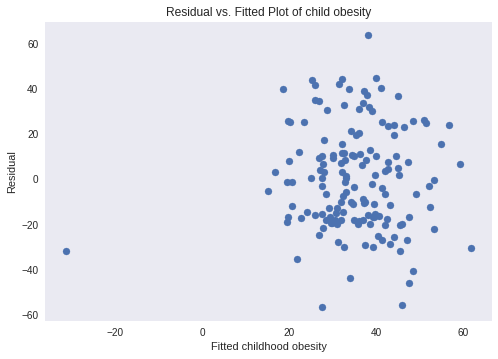

<Figure size 576x396 with 0 Axes>

In [42]:
# plotting the fixed v residuals for the complete model
plt.scatter(model_child_obesity.fittedvalues, model_child_obesity.resid)
plt.xlabel('Fitted childhood obesity')
plt.ylabel('Residual')
plt.title('Residual vs. Fitted Plot of child obesity')
plt.show()

plt.savefig('OLS rediduals v fitted values')

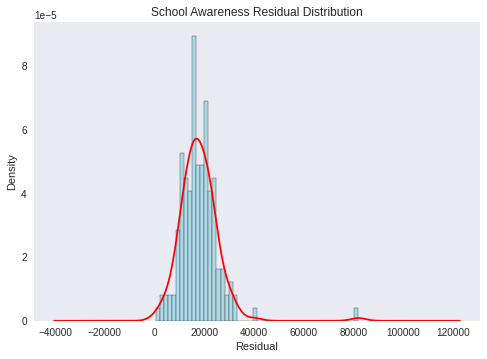

In [43]:
#school awareness residual distribution

df = child_obesity_numeric
df['residual'] = df['school_aw_prop'] - (df['school_aw_prop']*gradient + intercept)


df.head()


df['residual'].plot(kind = 'hist', bins = 50, color = 'lightblue', edgecolor = 'black', density = True, alpha=1)
df['residual'].plot(kind = 'kde', color = 'red')
plt.title('School Awareness Residual Distribution',fontsize=12)
plt.xlabel("Residual",fontsize=11)

plt.savefig('school awareness residual distribution')

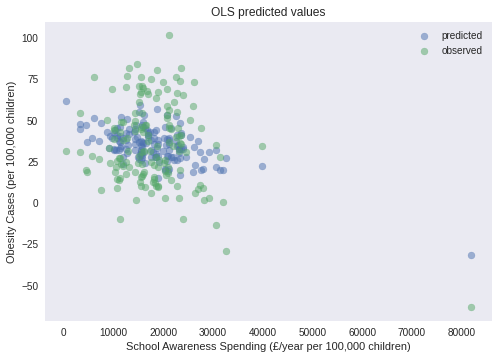

<Figure size 576x396 with 0 Axes>

In [44]:
#school awareness predicted v observed

# Plot predicted values

fix, ax = plt.subplots()
ax.scatter(child_obesity_numeric[['school_aw_prop']], model_child_obesity.predict(), alpha=0.5,
        label='predicted')

# Plot observed values

ax.scatter(child_obesity_numeric['school_aw_prop'], child_obesity_numeric['cases_prop'], alpha=0.5,
        label='observed')

ax.legend()
ax.set_title('OLS predicted values')
ax.set_xlabel('School Awareness Spending (£/year per 100,000 children)')
ax.set_ylabel('Obesity Cases (per 100,000 children)')
plt.show()

plt.savefig('school awareness predicted v observed')

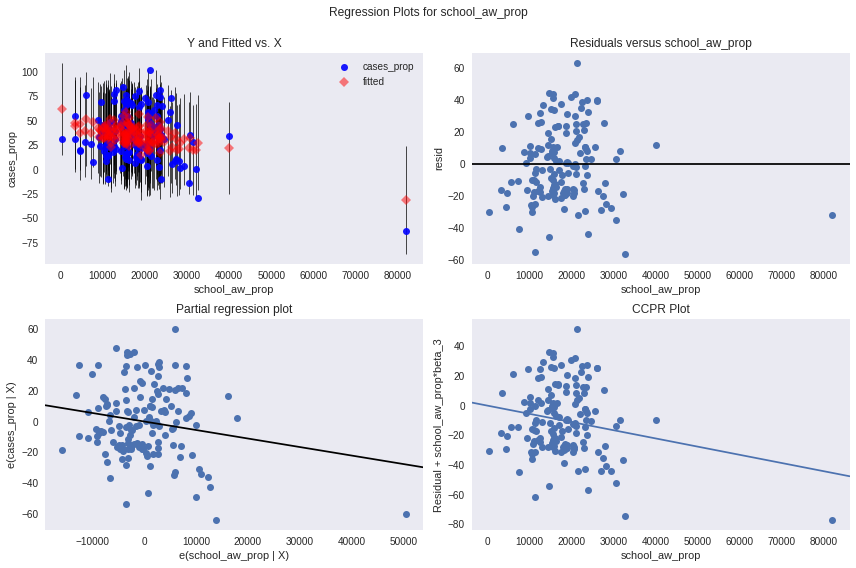

In [45]:
# school awareness regression plots

fig = plt.figure(figsize=(12,8))
fig = sm.graphics.plot_regress_exog(model_child_obesity, 'school_aw_prop', fig=fig)


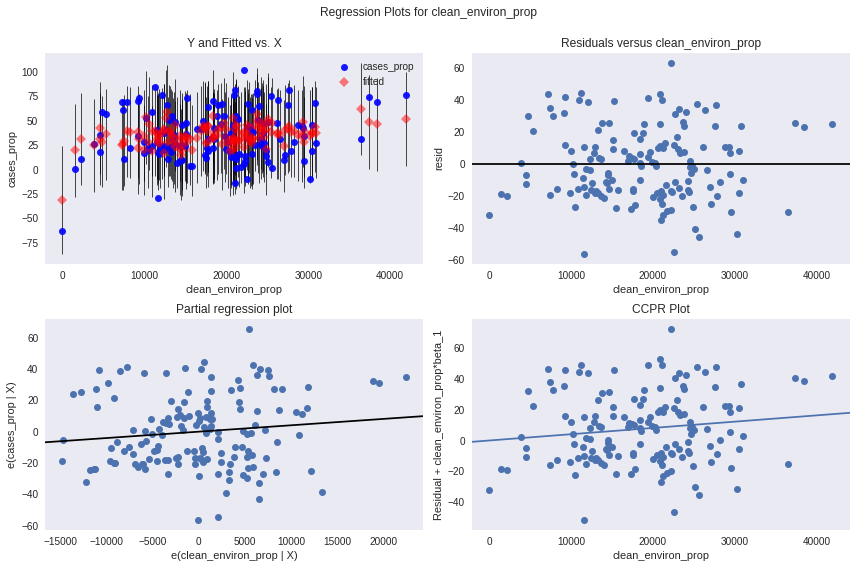

In [46]:
#clean environment regression plots

fig = plt.figure(figsize=(12,8))
fig = sm.graphics.plot_regress_exog(model_child_obesity, 'clean_environ_prop', fig=fig)

plt.savefig('clean environment regression plots')

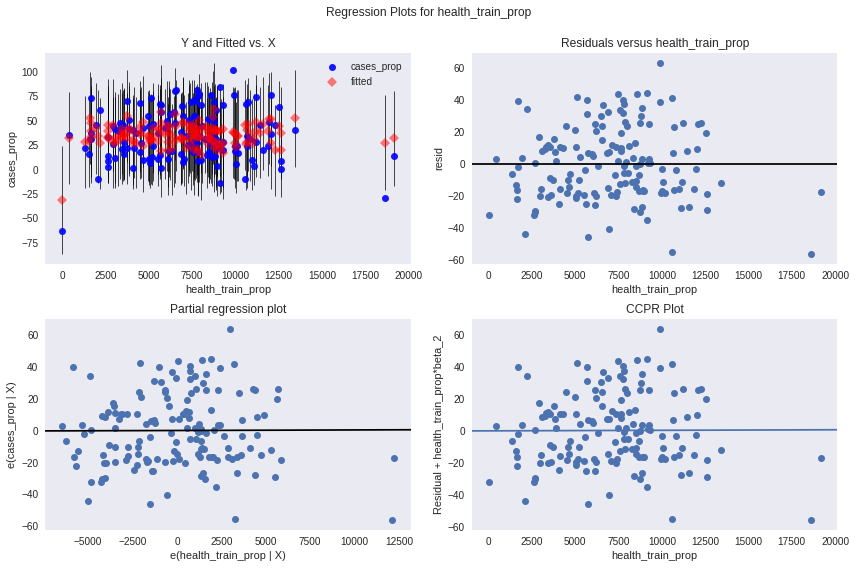

In [47]:
# health training regression plots

fig = plt.figure(figsize=(12,8))
fig = sm.graphics.plot_regress_exog(model_child_obesity, 'health_train_prop', fig=fig)

plt.savefig('health training regression plots')

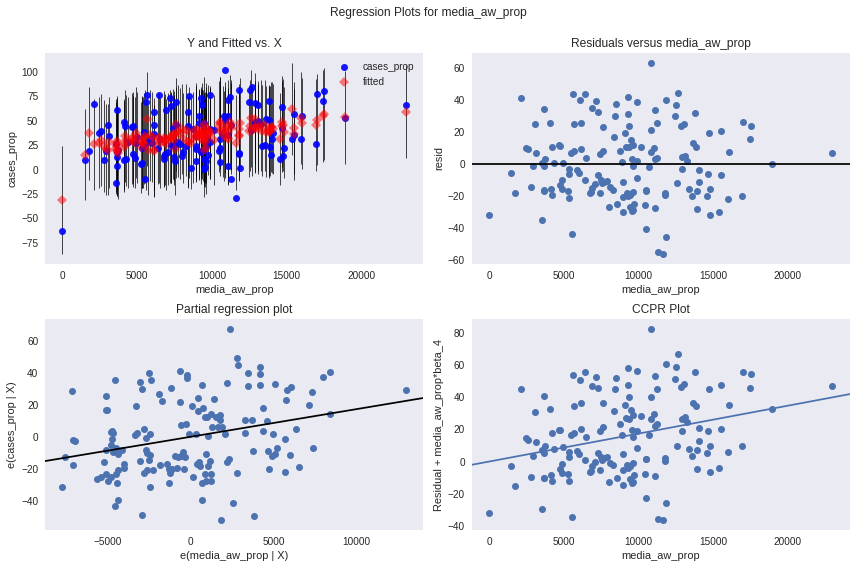

In [48]:
#media awareness regression plots

fig = plt.figure(figsize=(12,8))
fig = sm.graphics.plot_regress_exog(model_child_obesity, 'media_aw_prop', fig=fig)

plt.savefig('media awareness regression plots')

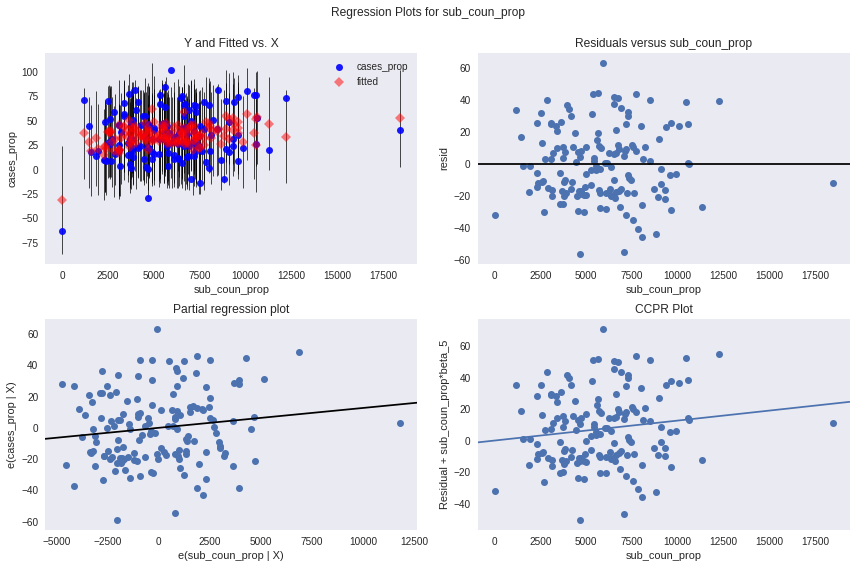

In [49]:
# subsidising counselling regression plots
fig = plt.figure(figsize=(12,8))
fig = sm.graphics.plot_regress_exog(model_child_obesity, 'sub_coun_prop', fig=fig)

plt.savefig('subsidising counselling regression plots')